## Week 6 Assignment - PFDA
##### Author: E. Qejvani

#### _Task:_

This program read a .csv file 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv' and plots:

- The temperature
- The mean temperature each day
- The mean temperature for each month
- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds 

***

### Preparatory Work:

In [1]:
# Importing all libraries needed for the project

import pandas as pd  
import matplotlib.pyplot as plt       

In [2]:
# Importing the dataset. I'm setting 'low_memory=False' for easier reading (removes errors), but takes a bit more time to read as all data types are read as object.
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=22, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [3]:
print(df.columns)

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


_Changing the datatype in the dataset._

As we can see from the 'print(df.columns)' command the date is set as an object datatype. With the following code we're changing object to datetime datatype.

In [4]:
# To avoid Warnings I'm making a copy of the dataset as a subset using only 'date' and 'temp' columns.
df_temp = df[['date', 'temp']].copy()

# Changing the date column to a datetime datatype.
df_temp['date'] = pd.to_datetime(df_temp['date'], format="%d-%b-%Y %H:%M", errors='coerce')



In [5]:
# Checking that the changes worked.
df_temp.dtypes              # Yes!

date    datetime64[ns]
temp           float64
dtype: object

In [6]:
df_temp.head(10)

,date,temp
0,1996-04-10 14:00:00,11.5
1,1996-07-31 08:00:00,11.5
2,1996-07-31 09:00:00,11.6
3,1996-07-31 10:00:00,12.9
4,1996-07-31 11:00:00,14.5
5,1996-07-31 12:00:00,14.4
6,1996-07-31 13:00:00,14.9
7,1996-07-31 14:00:00,13.9
8,1996-07-31 15:00:00,13.2
9,1996-07-31 16:00:00,15.1


***
##### _Task 1: Plotting the Temperature_

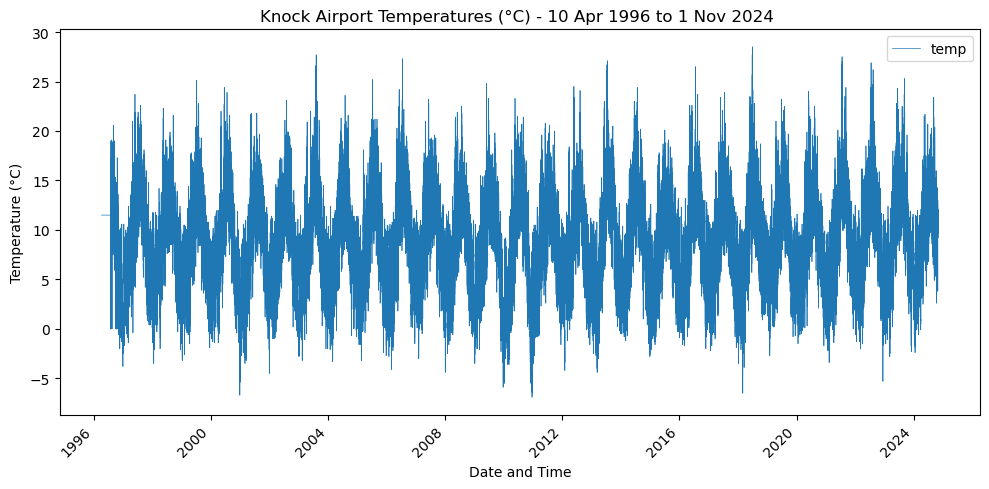

In [7]:
# Set 'Date' as the index for better datetime plotting
df_temp.set_index('date', inplace=True)

# Plotting the temperature:
df_temp.plot(y='temp', kind='line', figsize=(10, 5), linestyle='-', linewidth=0.5, markersize=2)
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.title('Knock Airport Temperatures (°C) - 10 Apr 1996 to 1 Nov 2024 ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***
##### _Task 2: Plotting after calculating the mean temperature for each day._

In [8]:
# Removing any leading/trailing spaces from column names.
df_temp.columns = df_temp.columns.str.strip()

# I'm changing the index from the 'date' column back to original index. Made it easier for me to calculate the mean temperature.
df_temp.reset_index(inplace=True)

# I'm converting back the date to object and removing the time from the 'date' column.
df_temp['date'] = pd.to_datetime(df_temp['date'], errors='coerce').dt.date 

# Checking the output of the date column to verify it worked
print(df_temp['date'].head())

0    1996-04-10
1    1996-07-31
2    1996-07-31
3    1996-07-31
4    1996-07-31
Name: date, dtype: object


In [9]:
# Grouping data by 'date' and calculating the mean temperature
daily_mean_df = df_temp.groupby('date')['temp'].mean().reset_index()

# Rename the 'temp' column in the new DataFrame to 'mean_temp' - easier to read.
daily_mean_df = daily_mean_df.rename(columns={'temp': 'mean_temp'})

# Checking the output to verify the changes I made worked.
print(daily_mean_df.head(10))       # Yes!


         date  mean_temp
0  1996-04-10  11.500000
1  1996-07-31  12.650000
2  1996-08-01  11.666667
3  1996-08-02  12.504167
4  1996-08-03  14.266667
5  1996-08-04  13.987500
6  1996-08-05  11.520833
7  1996-08-06  11.108333
8  1996-08-07  12.633333
9  1996-08-08  13.566667


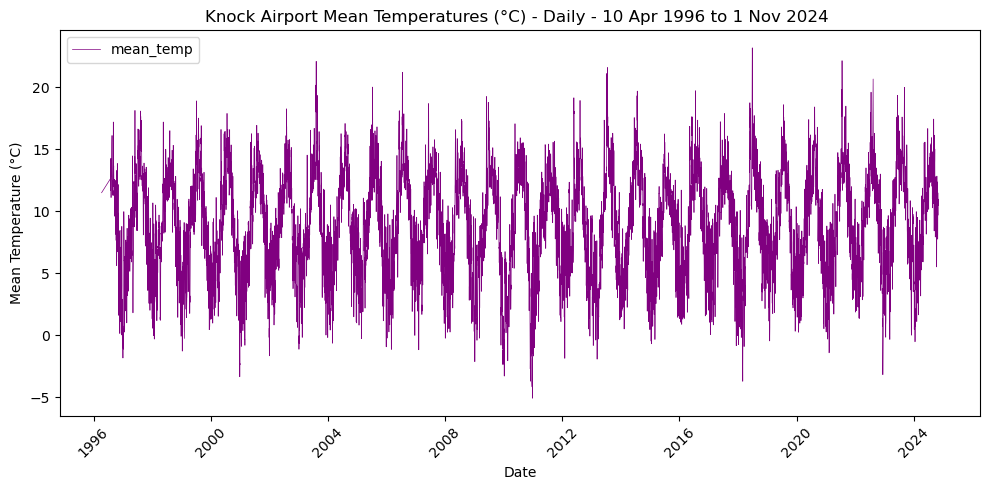

In [10]:
# Plot the data using mean temperature each day
daily_mean_df.plot(x='date',y='mean_temp', kind='line', figsize=(10, 5), linestyle='-', linewidth=0.5, markersize=2, color='purple')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Knock Airport Mean Temperatures (°C) - Daily - 10 Apr 1996 to 1 Nov 2024 ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***
##### _Task 3: Plotting the mean temp by month._

In [11]:
# Converting 'date' column to datetime format (again).
df_temp['date'] = pd.to_datetime(df_temp['date'], errors='coerce')

# Calculating mean temperature for each month
monthly_mean_temp = df_temp.groupby(df_temp['date'].dt.to_period('M'))['temp'].mean()

# Checking that the changes worked.
monthly_mean_temp.head(5)

date
1996-04    11.500000
1996-07    12.650000
1996-08    12.946909
1996-09    12.174306
1996-10     9.614113
Freq: M, Name: temp, dtype: float64

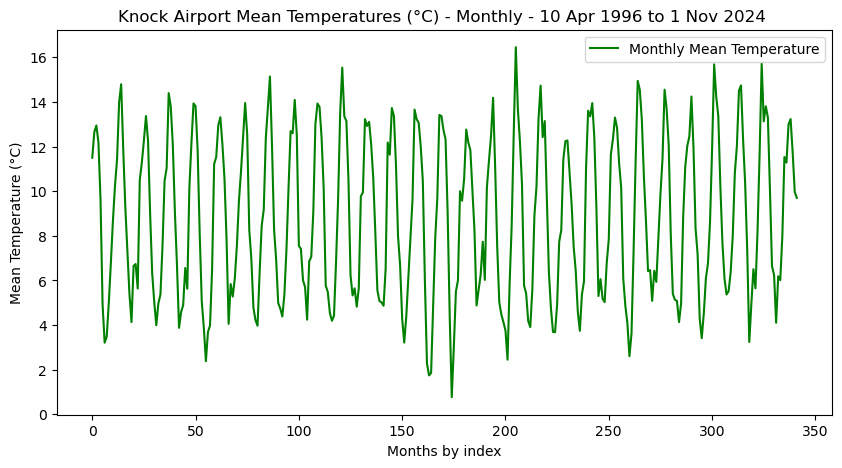

In [12]:
# Plotting the diagram.
plt.figure(figsize=(10, 5))
plt.plot(monthly_mean_temp.values, color='green', label='Monthly Mean Temperature')
plt.xlabel('Months by index')
plt.ylabel('Mean Temperature (°C)')
plt.title('Knock Airport Mean Temperatures (°C) - Monthly - 10 Apr 1996 to 1 Nov 2024 ')
plt.legend()
plt.show()

***
##### _Task 4: Plotting the Windspeed_